In [1]:
!git clone https://github.com/MohamedKhalifa1/Stack-Overflow-Annual-Developer-Survey-Analysis.git

Cloning into 'Stack-Overflow-Annual-Developer-Survey-Analysis'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 117 (delta 32), reused 52 (delta 16), pack-reused 47
Receiving objects: 100% (117/117), 32.20 MiB | 19.33 MiB/s, done.
Resolving deltas: 100% (40/40), done.


In [2]:
!unzip /content/Stack-Overflow-Annual-Developer-Survey-Analysis/data/preprocessed/01_preprocessed_data.zip

Archive:  /content/Stack-Overflow-Annual-Developer-Survey-Analysis/data/preprocessed/01_preprocessed_data.zip
  inflating: content/01_preprocessed_data.pkl  


In [3]:
ROLE_COLS      = ['DevType']
TECH_COLS      = ['LanguageHaveWorkedWith',
                  'DatabaseHaveWorkedWith',
                  'PlatformHaveWorkedWith',
                  'WebframeHaveWorkedWith',
                  'MiscTechHaveWorkedWith',
                  'ToolsTechHaveWorkedWith',
                  'NEWCollabToolsHaveWorkedWith']
EXCULDE_ROLES = [
    'Other (please specify):',
    'Student',
    'Designer',
    'Educator',
    'Marketing or sales professional',
    'Engineering manager',
    'Senior Executive (C-Suite, VP, etc.)',
    'Product manager',
    'Engineer, site reliability']
ROLES_RANGE = [1,3]
TECH_RANGE = [3,30]

In [36]:
PROCESSED_DATA_PATH = '/content/content/01_preprocessed_data.pkl'
FEATURE_SKILLS_PATH = "/content/Stack-Overflow-Annual-Developer-Survey-Analysis/data/preprocessed/02_features_skills_clusters.pkl"
EXPORT_PATH = "/content/Stack-Overflow-Annual-Developer-Survey-Analysis/data/preprocessed/04_cleaned_data.pkl"

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import gzip

In [6]:
processed_df = pd.read_pickle(PROCESSED_DATA_PATH)
feature_skills_df = pd.read_pickle(FEATURE_SKILLS_PATH)

In [7]:
processed_df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,[],NaN,[],NaN,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"[Employed, full-time]",Remote,"[Hobby, Contribute to open-source projects, Bo...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","[Books / Physical media, Colleague, Friend or ...",[Formal documentation provided by the owner of...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,"[DevOps function, Microservices, Automated tes...","Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"[Employed, full-time]","Hybrid (some remote, some in-person)","[Hobby, Professional development or self-paced...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","[Books / Physical media, Colleague, On the job...",[Formal documentation provided by the owner of...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,"[DevOps function, Microservices, Automated tes...","Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"[Employed, full-time]","Hybrid (some remote, some in-person)",[Hobby],"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","[Colleague, Friend or family member, Other onl...",[Formal documentation provided by the owner of...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,"[Automated testing, Continuous integration (CI...",NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"[Employed, full-time, Independent contractor, ...",Remote,"[Hobby, Contribute to open-source projects, Pr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","[Books / Physical media, Online Courses or Cer...",[Formal documentation provided by the owner of...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,"[Microservices, Automated testing, Observabili...",Other,Appropriate in length,Neither easy nor difficult,23456.0


In [8]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           89184 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     89184 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            89184 non-null  object 
 9   LearnCodeOnline                      89184 non-null  object 
 10  LearnCodeCoursesCert                 89184 non-null  object 
 11  YearsCode                   

In [9]:
processed_df.describe()

,ResponseId,YearsCode,YearsCodePro,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,87435.000000,66136.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,13.977926,11.266194,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,10.538807,9.211307,2.276847e+44,9.051989,6.814188e+05
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.000000,4.000000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,11.000000,9.000000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,20.000000,16.000000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,51.000000,51.000000,5.000000e+46,50.000000,7.435143e+07


In [10]:
feature_skills_df.head()

,skills_group_0,skills_group_1,skills_group_10,skills_group_11,skills_group_12,skills_group_13,skills_group_14,skills_group_15,skills_group_16,skills_group_17,...,skills_group_20,skills_group_21,skills_group_22,skills_group_3,skills_group_4,skills_group_5,skills_group_6,skills_group_7,skills_group_8,skills_group_9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,7,3,0,...,0,0,0,0,1,0,2,0,0,0
2,0,0,1,4,0,0,0,0,4,0,...,0,1,0,1,1,0,0,0,0,0
3,0,2,0,1,0,2,0,2,2,0,...,1,0,1,1,1,0,0,0,0,1
4,0,0,2,0,0,0,0,6,4,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
encoded_dfs = {}
for col in ROLE_COLS + TECH_COLS:
  processed_df[col].fillna('', inplace=True)
  processed_df[col] = processed_df[col].apply(lambda x: x if isinstance(x, list) else [x] if pd.notnull(x) else [])
  binarizer = MultiLabelBinarizer()
  encoded_df = pd.DataFrame(binarizer.fit_transform(processed_df[col]),
                               columns=binarizer.classes_,
                               index=processed_df[col].index)
  encoded_dfs[col] = encoded_df

In [12]:
df = pd.concat(encoded_dfs, axis=1)
df.head()

DevType                                                               \
          Academic researcher Blockchain Cloud infrastructure engineer   
0       1                   0          0                             0   
1       0                   0          0                             0   
2       0                   0          0                             0   
3       0                   0          0                             0   
4       0                   0          0                             0   

                                                                          \
  Data or business analyst Data scientist or machine learning specialist   
0                        0                                             0   
1                        0                                             0   
2                        0                                             0   
3                        0                                             0   
4                        0                                             0   

                                                                        ...  \
  Database administrator Designer DevOps specialist Developer Advocate  ...   
0                      0        0                 0                  0  ...   
1                      0        0                 0                  0  ...   
2                      0        0                 0                  0  ...   
3                      0        0                 0                  0  ...   
4                      0        0                 0                  0  ...   

  NEWCollabToolsHaveWorkedWith                                     \
                        Spyder Sublime Text TextMate VSCodium Vim   
0                            0            0        0        0   0   
1                            0            0        0        0   1   
2                            0            0        0        0   0   
3                            0            0        0        0   1   
4                            0            0        0        0   1   

                                                         
  Visual Studio Visual Studio Code WebStorm Xcode condo  
0             0                  0        0     0     0  
1             0                  1        0     0     0  
2             0                  0        0     0     0  
3             0                  1        1     0     0  
4             0                  1        0     0     0  

[5 rows x 304 columns]

In [13]:
# Select random int
i = np.random.randint(processed_df.shape[0])

# Print original values
print(processed_df.iloc[i][ROLE_COLS].tolist())
print(processed_df.iloc[i][TECH_COLS].tolist())
print("----------------")

# Print processed
print(df.iloc[i][df.iloc[i] == 1])
print("----------------")

# Check clustering
print("Clusters:",feature_skills_df.iloc[i].sum())
print("Skills:",  df[TECH_COLS].iloc[i].sum())

[['Developer, full-stack']]
[['C', 'C#', 'Dart', 'HTML/CSS', 'Java', 'SQL'], ['Cloud Firestore', 'Elasticsearch', 'Firebase Realtime Database', 'Microsoft SQL Server', 'MySQL'], ['Microsoft Azure'], ['ASP.NET', 'ASP.NET CORE', 'Blazor', 'CodeIgniter'], ['.NET (5+) ', '.NET Framework (1.0 - 4.8)', 'Flutter'], ['Docker', 'Gradle', 'Maven (build tool)', 'NuGet', 'Webpack', 'Yarn'], ['Android Studio', 'Eclipse', 'IntelliJ IDEA', 'Netbeans', 'Notepad++', 'Visual Studio', 'Visual Studio Code']]
----------------
DevType                       Developer, full-stack         1
LanguageHaveWorkedWith        C                             1
                              C#                            1
                              Dart                          1
                              HTML/CSS                      1
                              Java                          1
                              SQL                           1
DatabaseHaveWorkedWith        Cloud Firestore          

In [14]:
for role in EXCULDE_ROLES:
  df = df.drop(("DevType", role), axis=1)

In [15]:
df.head()

DevType                                                               \
          Academic researcher Blockchain Cloud infrastructure engineer   
0       1                   0          0                             0   
1       0                   0          0                             0   
2       0                   0          0                             0   
3       0                   0          0                             0   
4       0                   0          0                             0   

                                                                          \
  Data or business analyst Data scientist or machine learning specialist   
0                        0                                             0   
1                        0                                             0   
2                        0                                             0   
3                        0                                             0   
4                        0                                             0   

                                                               \
  Database administrator DevOps specialist Developer Advocate   
0                      0                 0                  0   
1                      0                 0                  0   
2                      0                 0                  0   
3                      0                 0                  0   
4                      0                 0                  0   

                        ... NEWCollabToolsHaveWorkedWith               \
  Developer Experience  ...                       Spyder Sublime Text   
0                    0  ...                            0            0   
1                    0  ...                            0            0   
2                    0  ...                            0            0   
3                    0  ...                            0            0   
4                    0  ...                            0            0   

                                                                               
  TextMate VSCodium Vim Visual Studio Visual Studio Code WebStorm Xcode condo  
0        0        0   0             0                  0        0     0     0  
1        0        0   1             0                  1        0     0     0  
2        0        0   0             0                  0        0     0     0  
3        0        0   1             0                  1        1     0     0  
4        0        0   1             0                  1        0     0     0  

[5 rows x 295 columns]

In [16]:
original_role_sum = df[ROLE_COLS].sum(axis = 0).sort_values(ascending=False).droplevel(level= 0).reset_index()
original_role_sum.columns = ['role','count']
original_role_sum

,role,count
0,"Developer, full-stack",25735
1,"Developer, back-end",13745
2,,12312
3,"Developer, front-end",5071
4,"Developer, desktop or enterprise applications",3904
5,"Developer, mobile",2597
6,"Developer, embedded applications or devices",1845
7,Data scientist or machine learning specialist,1588
8,DevOps specialist,1387
9,Academic researcher,1354


In [17]:
freq_role = df[ROLE_COLS].sum(axis=1)
freq_role

0        1
1        0
2        1
3        1
4        1
        ..
89179    1
89180    1
89181    1
89182    1
89183    1
Length: 89184, dtype: int64

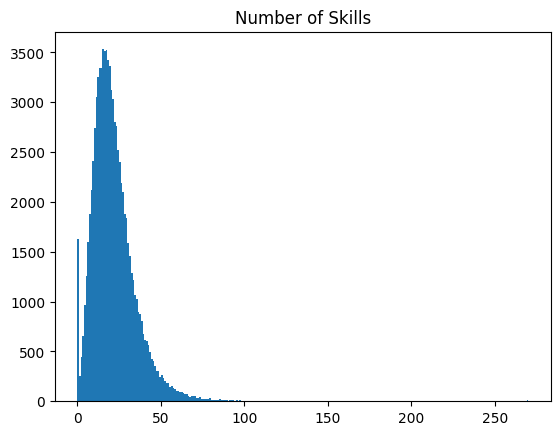

In [18]:
freq_tech = df[TECH_COLS].sum(axis=1)
plt.hist(freq_tech, freq_tech.max())
plt.title('Number of Skills')
plt.show()

In [19]:
role_mask = (freq_role >= ROLES_RANGE[0]) & (freq_role <= ROLES_RANGE[1])
tech_mask = (freq_tech >= TECH_RANGE[0]) & (freq_tech <= TECH_RANGE[1])

In [20]:
filter_mask = role_mask & tech_mask

In [21]:
filter_mask

0        False
1        False
2         True
3         True
4         True
         ...  
89179    False
89180     True
89181     True
89182    False
89183     True
Length: 89184, dtype: bool

In [22]:
feature_skills_df = feature_skills_df.loc[filter_mask].copy()
df = df.loc[filter_mask].copy()

In [23]:
feature_skills_df

,skills_group_0,skills_group_1,skills_group_10,skills_group_11,skills_group_12,skills_group_13,skills_group_14,skills_group_15,skills_group_16,skills_group_17,...,skills_group_20,skills_group_21,skills_group_22,skills_group_3,skills_group_4,skills_group_5,skills_group_6,skills_group_7,skills_group_8,skills_group_9
2,0,0,1,4,0,0,0,0,4,0,...,0,1,0,1,1,0,0,0,0,0
3,0,2,0,1,0,2,0,2,2,0,...,1,0,1,1,1,0,0,0,0,1
4,0,0,2,0,0,0,0,6,4,0,...,0,0,0,0,1,0,0,0,0,0
5,0,1,3,3,0,0,0,0,6,1,...,1,0,0,1,0,0,0,0,0,0
8,0,2,0,1,0,3,0,3,2,0,...,1,0,0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89176,0,0,0,0,0,3,0,1,0,1,...,0,0,1,2,0,0,3,0,0,5
89178,0,0,0,1,0,0,0,0,3,0,...,1,0,0,0,0,1,0,0,0,2
89180,0,0,2,0,0,0,0,0,2,0,...,0,0,0,1,0,0,5,0,0,6
89181,0,0,0,4,0,1,0,0,1,0,...,0,0,0,2,2,0,5,0,0,0


In [24]:
df.head()

DevType                                                               \
          Academic researcher Blockchain Cloud infrastructure engineer   
2       0                   0          0                             0   
3       0                   0          0                             0   
4       0                   0          0                             0   
5       0                   0          0                             0   
8       0                   0          0                             0   

                                                                          \
  Data or business analyst Data scientist or machine learning specialist   
2                        0                                             0   
3                        0                                             0   
4                        0                                             0   
5                        0                                             0   
8                        0                                             0   

                                                               \
  Database administrator DevOps specialist Developer Advocate   
2                      0                 0                  0   
3                      0                 0                  0   
4                      0                 0                  0   
5                      0                 0                  0   
8                      0                 0                  0   

                        ... NEWCollabToolsHaveWorkedWith               \
  Developer Experience  ...                       Spyder Sublime Text   
2                    0  ...                            0            0   
3                    0  ...                            0            0   
4                    0  ...                            0            0   
5                    0  ...                            0            0   
8                    0  ...                            0            0   

                                                                               
  TextMate VSCodium Vim Visual Studio Visual Studio Code WebStorm Xcode condo  
2        0        0   0             0                  0        0     0     0  
3        0        0   1             0                  1        1     0     0  
4        0        0   1             0                  1        0     0     0  
5        0        0   0             0                  0        0     0     0  
8        0        0   0             0                  1        0     0     0  

[5 rows x 295 columns]

In [25]:
cleaned_role_sum = df["DevType"].sum(axis = 0).sort_values(ascending=False).reset_index()
cleaned_role_sum.columns = ['role','count']
cleaned_role_sum

,role,count
0,"Developer, full-stack",19335
1,"Developer, back-end",11604
2,,8668
3,"Developer, front-end",4484
4,"Developer, desktop or enterprise applications",3377
5,"Developer, mobile",2290
6,"Developer, embedded applications or devices",1632
7,Data scientist or machine learning specialist,1286
8,Academic researcher,1117
9,Research & Development role,1075


In [26]:
feature_skills_df.columns = pd.MultiIndex.from_product([['skills_clusters'],
                                                  feature_skills_df.columns])

In [27]:
feature_skills_df

skills_clusters                                                 \
       skills_group_0 skills_group_1 skills_group_10 skills_group_11   
2                   0              0               1               4   
3                   0              2               0               1   
4                   0              0               2               0   
5                   0              1               3               3   
8                   0              2               0               1   
...               ...            ...             ...             ...   
89176               0              0               0               0   
89178               0              0               0               1   
89180               0              0               2               0   
89181               0              0               0               4   
89183               0              0               0               0   

                                                                       \
      skills_group_12 skills_group_13 skills_group_14 skills_group_15   
2                   0               0               0               0   
3                   0               2               0               2   
4                   0               0               0               6   
5                   0               0               0               0   
8                   0               3               0               3   
...               ...             ...             ...             ...   
89176               0               3               0               1   
89178               0               0               0               0   
89180               0               0               0               0   
89181               0               1               0               0   
89183               0               1               0               0   

                                       ...                                  \
      skills_group_16 skills_group_17  ... skills_group_20 skills_group_21   
2                   4               0  ...               0               1   
3                   2               0  ...               1               0   
4                   4               0  ...               0               0   
5                   6               1  ...               1               0   
8                   2               0  ...               1               0   
...               ...             ...  ...             ...             ...   
89176               0               1  ...               0               0   
89178               3               0  ...               1               0   
89180               2               0  ...               0               0   
89181               1               0  ...               0               0   
89183               2               1  ...               0               1   

                                                                    \
      skills_group_22 skills_group_3 skills_group_4 skills_group_5   
2                   0              1              1              0   
3                   1              1              1              0   
4                   0              0              1              0   
5                   0              1              0              0   
8                   0              9              0              0   
...               ...            ...            ...            ...   
89176               1              2              0              0   
89178               0              0              0              1   
89180               0              1              0              0   
89181               0              2              2              0   
89183               0             10              0              0   

                                                                   
      skills_group_6 skills_group_7 skills_group_8 skills_group_9  
2                  0              0              0       

In [28]:
df = pd.concat([df, feature_skills_df], axis=1)
df

DevType                                                               \
              Academic researcher Blockchain Cloud infrastructure engineer   
2           0                   0          0                             0   
3           0                   0          0                             0   
4           0                   0          0                             0   
5           0                   0          0                             0   
8           0                   0          0                             0   
...       ...                 ...        ...                           ...   
89176       1                   0          0                             0   
89178       0                   0          0                             0   
89180       0                   0          0                             0   
89181       1                   0          0                             0   
89183       0                   0          0                             0   

                                                                              \
      Data or business analyst Data scientist or machine learning specialist   
2                            0                                             0   
3                            0                                             0   
4                            0                                             0   
5                            0                                             0   
8                            0                                             0   
...                        ...                                           ...   
89176                        0                                             0   
89178                        0                                             0   
89180                        0                                             0   
89181                        0                                             0   
89183                        0                                             0   

                                                                   \
      Database administrator DevOps specialist Developer Advocate   
2                          0                 0                  0   
3                          0                 0                  0   
4                          0                 0                  0   
5                          0                 0                  0   
8                          0                 0                  0   
...                      ...               ...                ...   
89176                      0                 0                  0   
89178                      0                 0                  0   
89180                      0                 0                  0   
89181                      0                 0                  0   
89183                      0                 0                  0   

                            ... skills_clusters                  \
      Developer Experience  ... skills_group_20 skills_group_21   
2                        0  ...               0               1   
3                        0  ...               1               0   
4                        0  ...               0               0   
5                        0  ...               1               0   
8                        0  ...               1               0   
...                    ...  ...             ...             ...   
89176                    0  ...               0               0   
89178                    0  ...               1               0   
89180                    0  ...               0               0   
89181                    0  ...               0               0   
89183                    0  ...               0               1   

                                                                    \
      skills_group_22 skills_group_3 skills_group_4 skills_group_5   
2                   0              1    

In [29]:
df.to_pickle(EXPORT_PATH)

In [37]:
with open('/content/Stack-Overflow-Annual-Developer-Survey-Analysis/data/preprocessed/04_cleaned_data.pkl', 'rb') as f_in:
    data = pickle.load(f_in)

with gzip.open('/content/Stack-Overflow-Annual-Developer-Survey-Analysis/data/preprocessed/04_cleaned_data.pkl.gz', 'wb') as f_out:
    pickle.dump(data, f_out)


FileNotFoundError: [Errno 2] No such file or directory: '/content/Stack-Overflow-Annual-Developer-Survey-Analysis/data/preprocessed/04_cleaned_data.pkl'